# Phase 1 - Exploratory analysis
### Authors: Karolina Skrypova(50%), Oleh Fedunchyk(50%)
Goal: In the first phase of the project, we will perform an exploratory analysis of the data. This will help us to understand the data and its characteristics to make better decisions in the next phases of the project and create the best model for machine learning.

## Importing libraries

In [853]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Loading the data

In [854]:
profiles_data = pd.read_csv('dataset-120/profiles.csv', sep='\t')
connections_data = pd.read_csv('dataset-120/connections.csv', sep='\t')
devices_data = pd.read_csv('dataset-120/devices.csv', sep='\t')
proccesses_data = pd.read_csv('dataset-120/processes.csv', sep='\t')

## 1.1 Basic description of the data together with their characteristics
### A: Analysis of data structures such as files (structures and relationships, number, types, ...), records(structures, number of records, number of attributes, types, ...)

#### Dataset 1: profiles

At the beginning we will take a look at how the data in the profiles dataset looks like. 

In [855]:
profiles_data.head()

,registration,imei,username,ssn,user_id,name,job,address,current_location,birthdate,mail,company
0,02 Apr 2024,8630330696303481594,regina30,719-26-3476,507,Rebecca Moreno,"Librarian, public",Unit 5700 Box 8952\r\nDPO AP 70659,"(Decimal('43.251681'), Decimal('4.085137'))",1977-03-13,cjohnson@hotmail.com,Shepard Ltd
1,2021-10-02,863033069630348412,ronaldhughes,500-12-7252,1158,Joshua Hicks,NaN,NaN,"(Decimal('-7.708654'), Decimal('144.652216'))",1980-10-08,ggray@gmail.com,Coleman LLC
2,"05/23/2022, 00:00:00",8630330696303482477,zwarren,073-28-3258,2379,Rebecca Hudson,NaN,"4506 John Road\r\nMillerborough, ME 08112","(Decimal('53.531034'), Decimal('100.682080'))",NaN,eric54@yahoo.com,"Hinton, Fuller and French"
3,"03/23/2023, 00:00:00",3590433799317661230,grimessamuel,006-67-1751,954,Victoria Hughes,NaN,NaN,"(Decimal('-17.4220355'), Decimal('-30.820327'))",NaN,melissajohnson@gmail.com,"Erickson, Robinson and Bailey"
4,"09/17/2020, 00:00:00",359043379931766437,obrown,188-07-0566,1409,Michael Petersen,NaN,"94495 Smith Fork Suite 229\r\nChandlerberg, MD...",NaN,NaN,ryan13@yahoo.com,Murphy PLC


This dataset contains information about users.

With a few commands we can find out more information about the dataset.

In [856]:
profiles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   registration      2535 non-null   object
 1   imei              2535 non-null   int64 
 2   username          2535 non-null   object
 3   ssn               2535 non-null   object
 4   user_id           2535 non-null   int64 
 5   name              2535 non-null   object
 6   job               761 non-null    object
 7   address           2155 non-null   object
 8   current_location  2408 non-null   object
 9   birthdate         1394 non-null   object
 10  mail              2535 non-null   object
 11  company           2535 non-null   object
dtypes: int64(2), object(10)
memory usage: 237.8+ KB


Using the info() statement, we found the data types for the individual attributes. 
We also found that the dataset has 2535 rows in it.
The number of attributes for this dataset is 12.
We can see that in this dataset 2 attributes have type int, and the rest object. 
We also found the range index, and we can see how many non-null entries there are in each attribute.

**Attributes:**
- registration - date: date of registration
- imei - number: unique number for each mobile device
- username - text: username
- ssn - specific type: social security number; citizen identification number
- user_id - number: unique number for each user
- name - text: user name
- job - text: occupation of the user
- address - text: address of the user
- current_location - text: current location of the user
- birthdate - date: date of birth of the user
- mail - text: user's email
- company - text: user's company

In [857]:
profiles_data.describe(exclude=np.number)

,registration,username,ssn,name,job,address,current_location,birthdate,mail,company
count,2535,2535,2535,2535,761,2155,2408,1394,2535,2535
unique,2233,2489,2535,2482,445,2155,2408,1377,2525,2409
top,08 Nov 2020,zwhite,663-26-6444,Michael Martinez,"Exhibitions officer, museum/gallery","971 Griffin Landing\r\nNew Patricia, CT 88011","(Decimal('59.762173'), Decimal('123.344113'))",1908-09-24,mitchelldavid@yahoo.com,Johnson Group
freq,5,3,1,4,6,1,1,2,2,5


Here we did univariate analysis for individual attributes.

In [858]:
profiles_data.dropna().shape[0]


328

328 rows have all attributes filled in.

In [859]:
profiles_data.shape[0] - profiles_data.dropna().shape[0]

2207

2207 rows have at least one attribute unfilled.

In [860]:
profiles_data.nunique()

registration        2233
imei                 494
username            2489
ssn                 2535
user_id             1578
name                2482
job                  445
address             2155
current_location    2408
birthdate           1377
mail                2525
company             2409
dtype: int64

Nunique shows us how many unique values are in each attribute. 

In [861]:
profiles_data.shape[0] - profiles_data.drop_duplicates().shape[0]

0

The number of duplicate rows is 0.

In [862]:
profiles_data.isnull().sum()

registration           0
imei                   0
username               0
ssn                    0
user_id                0
name                   0
job                 1774
address              380
current_location     127
birthdate           1141
mail                   0
company                0
dtype: int64

Above is the number of null values in the individual attributes

#### Dataset 2: connections
At the beginning we will take a look at how the data in the connections dataset looks like. 

In [863]:
connections_data.head()

,ts,imei,mwra,c.katana,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.UCMobile.intl,c.updateassist,c.UCMobile.x86,c.android.vending,c.raider
0,2018-05-05 10:00:00,3590433799317661339,1.0,12.59948,8.68233,10.47388,10.83279,9.88566,42.78450,68.04373,48.16608,29.46806,62.29823
1,2018-05-05 10:01:00,8630330696303481149,0.0,10.12035,13.40907,9.91671,12.68924,9.97613,41.56210,50.81831,34.35584,27.40876,58.79877
2,2018-05-05 10:02:00,3590433799317662295,0.0,15.37526,17.28039,17.43219,11.82565,13.14464,68.96152,42.46043,52.57066,42.52979,14.00816
3,2018-05-05 10:03:00,3590433799317662113,0.0,12.23041,8.08404,11.92790,12.78835,12.77756,61.50057,62.83317,43.63141,78.21635,85.93087
4,2018-05-05 10:04:00,359043379931766486,1.0,10.15839,8.09159,11.92699,7.43053,9.74092,61.38455,64.47625,34.24340,68.61573,3.01488


With a few commands we can find out more information about the dataset.

In [864]:
connections_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15145 entries, 0 to 15144
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ts                 15145 non-null  object 
 1   imei               15145 non-null  int64  
 2   mwra               15145 non-null  float64
 3   c.katana           15145 non-null  float64
 4   c.dogalize         15145 non-null  float64
 5   c.android.gm       15145 non-null  float64
 6   c.android.chrome   15145 non-null  float64
 7   c.android.youtube  15145 non-null  float64
 8   c.UCMobile.intl    15145 non-null  float64
 9   c.updateassist     15145 non-null  float64
 10  c.UCMobile.x86     15145 non-null  float64
 11  c.android.vending  15145 non-null  float64
 12  c.raider           15145 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


Using the info() statement, we found the data types for the individual attributes. 
We also found that the dataset has 15145 rows in it.
The number of attributes for this dataset is 13.
We can see that in this dataset 11 attributes have type float, 1 attribute - type int and one attribute - type object. 
We have also found the range index, and we can see how many non-zero positions are in each attribute.
In this dataset all rows have all attributes filled.

**Attributes:**
- ts - timestamp: date and time
- imei - int: unique number for each mobile device
- mwra - float: values between 0 and 1; malware activity
- c.katana, c.dogalize, c.android.gm, c.android.chrome, c.android.youtube, c.UCMobile.intl, c.updateassist, c.UCMobile.x86, c.android.vending, c.raider - 
float: these attributes denote some activity or application that the user is using on his mobile device. Each column has a name according to the application. These values mean some metric.

**Univariate analysis:**

Continuous:

In [865]:
connections_data.describe()

,imei,mwra,c.katana,c.dogalize,c.android.gm,c.android.chrome,c.android.youtube,c.UCMobile.intl,c.updateassist,c.UCMobile.x86,c.android.vending,c.raider
count,1.514500e+04,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000,15145.000000
mean,3.888406e+18,0.625157,12.753468,10.978112,12.170533,11.617357,11.626803,60.290531,54.567888,51.059147,49.678824,49.810844
std,3.334890e+18,0.484098,1.863855,2.705844,2.392459,2.500184,2.490396,11.088297,11.328329,12.209954,28.978242,28.866897
min,3.590434e+17,0.000000,5.577070,2.953200,0.000000,2.433500,0.873520,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.630331e+17,0.000000,11.493940,8.968680,10.776180,9.946600,10.077080,52.925080,47.021990,42.745990,24.693380,24.690250
50%,3.590434e+18,1.000000,12.747460,10.882380,12.374110,11.857690,11.934540,60.321530,54.615610,50.992960,49.257060,49.491280
75%,8.630331e+18,1.000000,14.003480,12.896070,13.793090,13.402420,13.396620,67.661290,62.179120,59.253310,74.859170,74.916930
max,8.630331e+18,1.000000,20.062980,21.529560,21.292520,20.337690,19.879360,100.000000,100.000000,100.000000,100.000000,100.000000


Categorical:

In [866]:
connections_data.describe(exclude=np.number)

,ts
count,15145
unique,14965
top,2018-05-06 20:17:00
freq,2


The following statement confirms that all rows have all attributes filled in.

In [867]:
connections_data.dropna().shape[0]


15145

This display shows the number of unique values in each attribute.

In [868]:
connections_data.nunique()

ts                   14965
imei                   500
mwra                     2
c.katana             14785
c.dogalize           14859
c.android.gm         14838
c.android.chrome     14855
c.android.youtube    14825
c.UCMobile.intl      14927
c.updateassist       14929
c.UCMobile.x86       14936
c.android.vending    14961
c.raider             14958
dtype: int64

The number of duplicate rows is 180 according to the command below.

In [869]:
connections_data.shape[0] - connections_data.drop_duplicates().shape[0]

180

#### Dataset 3: devices

#### Dataset 4: proccesses

### 1.2 A-B: Before we can continue with the analysis, we need to fix problems with the data.

#### Dataset 1: profiles
##### Problems with the dataset:
- Dataset contains missing values
- user_id is not unique for each user
- registration is not in the correct format(each date should be in the same format)
- formatting of adress and location is not easy to read

**Fix registration format:**

In [870]:
profiles_data["registration"].head()

0             02 Apr 2024
1              2021-10-02
2    05/23/2022, 00:00:00
3    03/23/2023, 00:00:00
4    09/17/2020, 00:00:00
Name: registration, dtype: object

In [871]:
registration_same_format = pd.to_datetime(profiles_data["registration"], format='mixed')
profiles_data["registration"] = registration_same_format
profiles_data["registration"].head()

0   2024-04-02
1   2021-10-02
2   2022-05-23
3   2023-03-23
4   2020-09-17
Name: registration, dtype: datetime64[ns]

Now we can see that the registration attribute is in the correct same format.

**Fix address format:**

In [872]:
profiles_data["address"].head()

0                   Unit 5700 Box 8952\r\nDPO AP 70659
1                                                  NaN
2            4506 John Road\r\nMillerborough, ME 08112
3                                                  NaN
4    94495 Smith Fork Suite 229\r\nChandlerberg, MD...
Name: address, dtype: object

In [873]:
profiles_data["address"] = profiles_data["address"].str.replace(r'\r\n', ' ', regex=True)

In [874]:
profiles_data["address"].head()

0                      Unit 5700 Box 8952 DPO AP 70659
1                                                  NaN
2               4506 John Road Millerborough, ME 08112
3                                                  NaN
4    94495 Smith Fork Suite 229 Chandlerberg, MD 49543
Name: address, dtype: object

As we can see, the address attribute is now in more readable format. We replaced \r\n with a space.

**Fix location format:**

In [875]:
profiles_data['current_location'].head()

0        (Decimal('43.251681'), Decimal('4.085137'))
1      (Decimal('-7.708654'), Decimal('144.652216'))
2      (Decimal('53.531034'), Decimal('100.682080'))
3    (Decimal('-17.4220355'), Decimal('-30.820327'))
4                                                NaN
Name: current_location, dtype: object

In [876]:
profiles_data['current_location'] = profiles_data['current_location'].astype(str).str.replace('Decimal\\(', '', regex=True)
profiles_data['current_location'] = profiles_data['current_location'].str.replace('\\(', '', regex=True)
profiles_data['current_location'] = profiles_data['current_location'].str.replace('\\)', '', regex=True)
profiles_data['current_location'] = profiles_data['current_location'].str.replace("\\'", '', regex=True)

profiles_data['current_location'] = profiles_data['current_location'].apply(lambda x: tuple(map(float, x.split(','))) if x != 'nan' else x)

In [877]:
profiles_data['current_location'].head()

0        (43.251681, 4.085137)
1      (-7.708654, 144.652216)
2       (53.531034, 100.68208)
3    (-17.4220355, -30.820327)
4                          nan
Name: current_location, dtype: object

Removed redundant Decimal word from the location attribute.

**Fix birthdate to datetime:**

In [878]:
profiles_data['birthdate'] = pd.to_datetime(profiles_data['birthdate'], format='%Y-%m-%d', errors='coerce')
profiles_data['birthdate'].head()

0   1977-03-13
1   1980-10-08
2          NaT
3          NaT
4          NaT
Name: birthdate, dtype: datetime64[ns]

As we can see, the birthdate attribute is now in the correct format. We converted it to datetime. And all NaN values are now NaT(Not a Time).

**Duplicated values:**

In [879]:
duplicates_rows = profiles_data[profiles_data.duplicated(subset=['user_id'], keep=False)] # find all duplicates
duplicates = duplicates_rows['user_id'].value_counts() # count the number of duplicates for each user_id
duplicates = duplicates.reset_index() 
duplicates.columns = ['user_id', 'count']
duplicates.head()

,user_id,count
0,500,7
1,1218,7
2,1054,6
3,100,5
4,239,5


As we can see here a lot of user_id values are duplicated. That is a problem because we need to have unique values for each user.

#### Dataset 2: connections
##### Problems with the dataset:
- Dataset contains duplicited rows
- ts: shoud be datetime type

**Fix duplicated rows**

In [880]:
connections_data.shape[0] - connections_data.drop_duplicates().shape[0]

180

180 rows is duplicated.

In [881]:
connections_data = connections_data.drop_duplicates()

In [882]:
connections_data.shape[0] - connections_data.drop_duplicates().shape[0]

0

So as we can see, we have fixed the problems with the data. And now the number of duplicated rows is 0.

**Fix ts format:**

In [883]:
connections_data['ts'].head()

0    2018-05-05 10:00:00
1    2018-05-05 10:01:00
2    2018-05-05 10:02:00
3    2018-05-05 10:03:00
4    2018-05-05 10:04:00
Name: ts, dtype: object

In [884]:
connections_data['ts'] = pd.to_datetime(connections_data['ts'], format='%Y-%m-%d %H:%M:%S')

In [885]:
connections_data['ts'].head()

0   2018-05-05 10:00:00
1   2018-05-05 10:01:00
2   2018-05-05 10:02:00
3   2018-05-05 10:03:00
4   2018-05-05 10:04:00
Name: ts, dtype: datetime64[ns]

We have also fixed the ts attribute. Now it is in the correct format: datetime.

#### Dataset 3: devices

#### Dataset 4: proccesses

### B: Analysis of individual attributes: for the selected significant attributes (min 10), analyse their distributions and basic descriptive statistics.

#### Dataset 1: profiles
##### Significant attributes:

**Registation date**

Format registation date to same format.

We can see how many users have registered in each year.

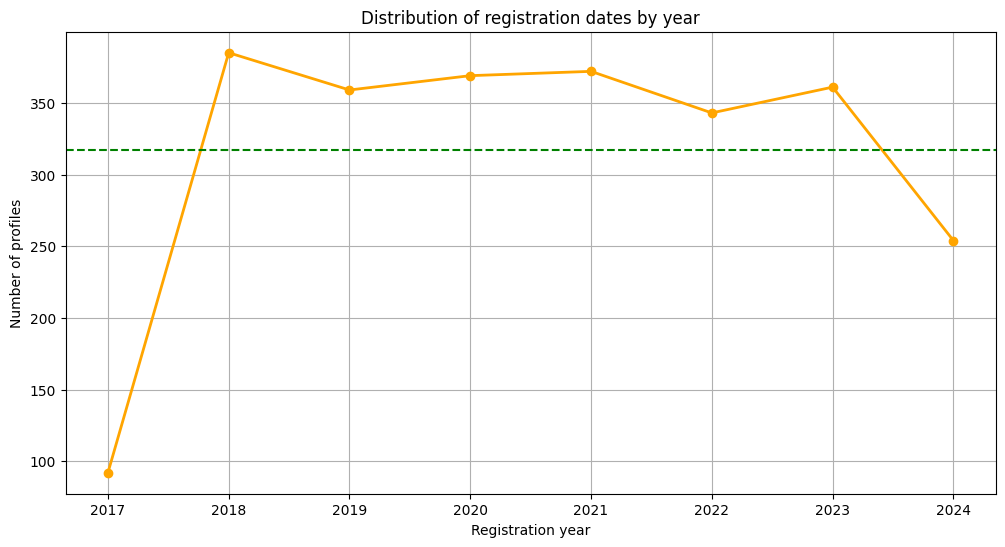

In [886]:
registation_years = profiles_data['registration'].dt.year

year_mean = registation_years.value_counts().mean()

plt.figure(figsize=(12, 6))
plt.plot(registation_years.value_counts().sort_index(), marker='o', color='orange',linewidth=2)
plt.title('Distribution of registration dates by year')
plt.xlabel('Registration year')
plt.ylabel('Number of profiles')
plt.axhline(year_mean, color='green', linestyle='--')

plt.grid()
plt.show()

As we can see, the most users registered in 2018. Users started to register in 2017 and in 2024 the registration number is falling. The green line shows the average number of registrations per year.

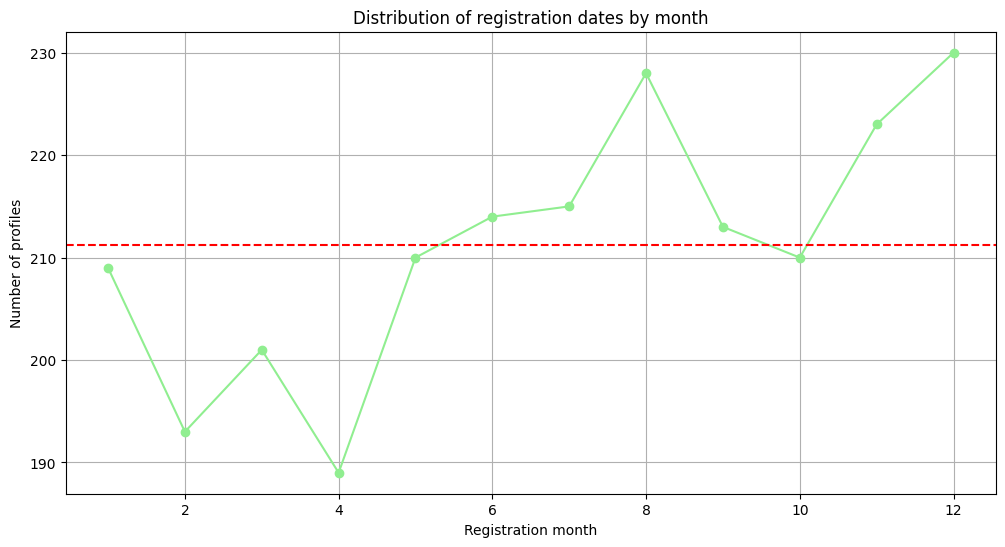

In [887]:
registration_months = profiles_data['registration'].dt.month

month_mean = registration_months.value_counts().mean()

plt.figure(figsize=(12, 6))
plt.plot(registration_months.value_counts().sort_index(), marker='o', color='lightgreen')
plt.title('Distribution of registration dates by month')
plt.xlabel('Registration month')
plt.ylabel('Number of profiles')

plt.axhline(month_mean, color='red', linestyle='--')
plt.grid()
plt.show()

As we can see, the most users register in December and second part of the year. The red line shows the average number of registrations per month.

**Bitrhdate**


In the start we will delete the rows with missing values in the birthdate attribute.

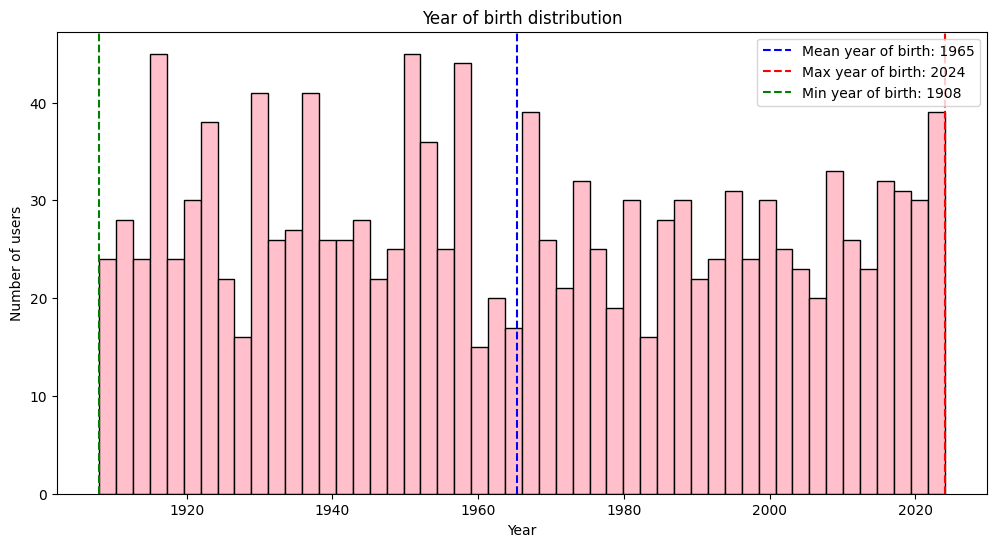

In [888]:
birthdate_years = profiles_data['birthdate'].dt.year.dropna() 
mean_year_birthday = birthdate_years.mean()
max_year_birthday = birthdate_years.max()
min_year_birthday = birthdate_years.min()
plt.figure(figsize=(12, 6))
plt.hist(birthdate_years, bins=50, color='pink', edgecolor='black')
plt.title('Year of birth distribution')
plt.xlabel('Year')
plt.ylabel('Number of users')
plt.axvline(mean_year_birthday, color='blue', linestyle='--', label='Mean year of birth: '+str(int(mean_year_birthday)))
plt.axvline(max_year_birthday, color='red', linestyle='--', label='Max year of birth: '+str(int(max_year_birthday)))
plt.axvline(min_year_birthday, color='green', linestyle='--', label='Min year of birth: '+str(int(min_year_birthday)))
plt.legend()
plt.show()

As we can see above, the average year of birth was 1965. But some data not give us the correct information. The oldest user was born in 1908 and the youngest in 2024. This is not possible as if person was born in 1908, now he would be 114 years old.

**Email domains**

Let's prepare the data for the analysis. We will extract the domain from the email address. Duplicate mails will be removed.

In [889]:
mail_domain = profiles_data['mail'].drop_duplicates().str.split('@').str[1]
mail_domain.value_counts()

mail
yahoo.com      853
gmail.com      838
hotmail.com    834
Name: count, dtype: int64

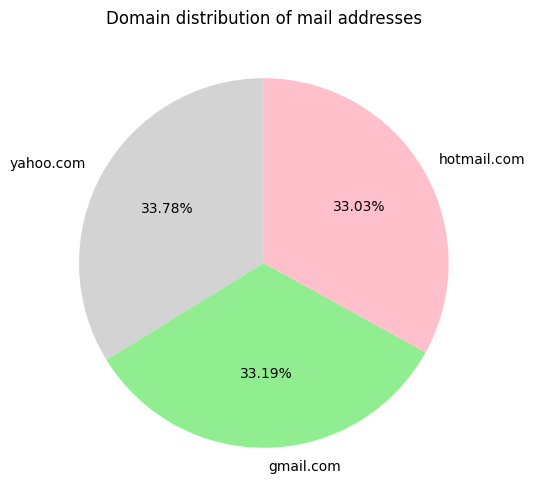

In [890]:
plt.figure(figsize=(8, 6))
plt.title(f'Domain distribution of mail addresses')
mail_domain.value_counts().plot.pie(autopct='%1.2f%%', startangle=90, colors=['lightgrey', 'lightgreen', 'pink'])
plt.ylabel('')
plt.show()

In the plot above we can see that mail domain distribution is very balanced. The most popular domain is yahoo.com. But the difference between the most popular and the least popular domain is not significant.

#### Dataset 2: connections

**mwra**

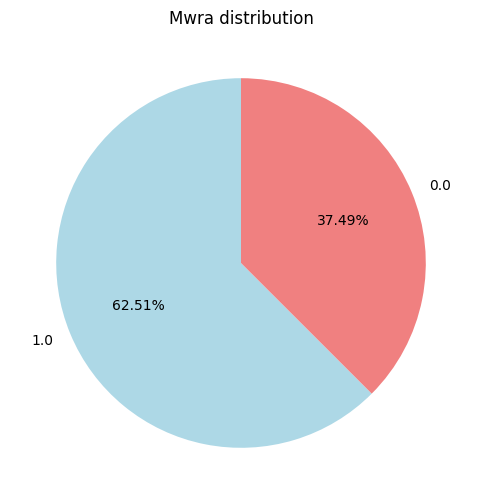

In [891]:
plt.figure(figsize=(8, 6))
plt.title(f'Mwra distribution')
connections_data['mwra'].value_counts().plot.pie(autopct='%1.2f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.ylabel('')
plt.show()

A histogram of the mwra attribute is shown above. The histogram shows that the values are between 0 and 1. The value 1 is more popular that 0.

**c.android.youtube**

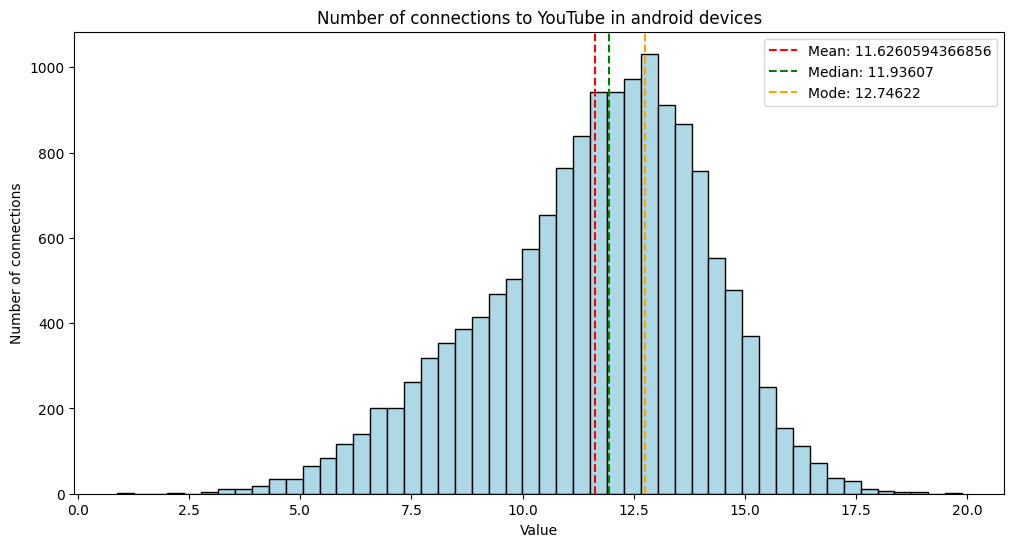

In [892]:
mean_conn_youtube = connections_data['c.android.youtube'].mean()
median_conn_youtube = connections_data['c.android.youtube'].median()
mode_conn_youtube = connections_data['c.android.youtube'].mode()[0]

plt.figure(figsize=(12, 6))
plt.hist(connections_data['c.android.youtube'], bins=50, color='lightblue', edgecolor='black')
plt.title('Number of connections to YouTube in android devices')
plt.xlabel('Value')
plt.ylabel('Number of connections')
plt.axvline(mean_conn_youtube, color='red', linestyle='--', label='Mean: '+str(mean_conn_youtube))
plt.axvline(median_conn_youtube, color='green', linestyle='--', label='Median: '+str(median_conn_youtube))
plt.axvline(mode_conn_youtube, color='orange', linestyle='--', label='Mode: '+str(mode_conn_youtube))
plt.legend()
plt.show()


As we can see above, this is negative skewed distribution. The most values are between 5 and 17.5. The average value is 11.6.

Quick overwiev of the data in connections dataset.

array([[<Axes: title={'center': 'mwra'}>,
        <Axes: title={'center': 'c.katana'}>,
        <Axes: title={'center': 'c.dogalize'}>],
       [<Axes: title={'center': 'c.android.gm'}>,
        <Axes: title={'center': 'c.android.chrome'}>,
        <Axes: title={'center': 'c.android.youtube'}>],
       [<Axes: title={'center': 'c.UCMobile.intl'}>,
        <Axes: title={'center': 'c.updateassist'}>,
        <Axes: title={'center': 'c.UCMobile.x86'}>],
       [<Axes: title={'center': 'c.android.vending'}>,
        <Axes: title={'center': 'c.raider'}>, <Axes: >]], dtype=object)

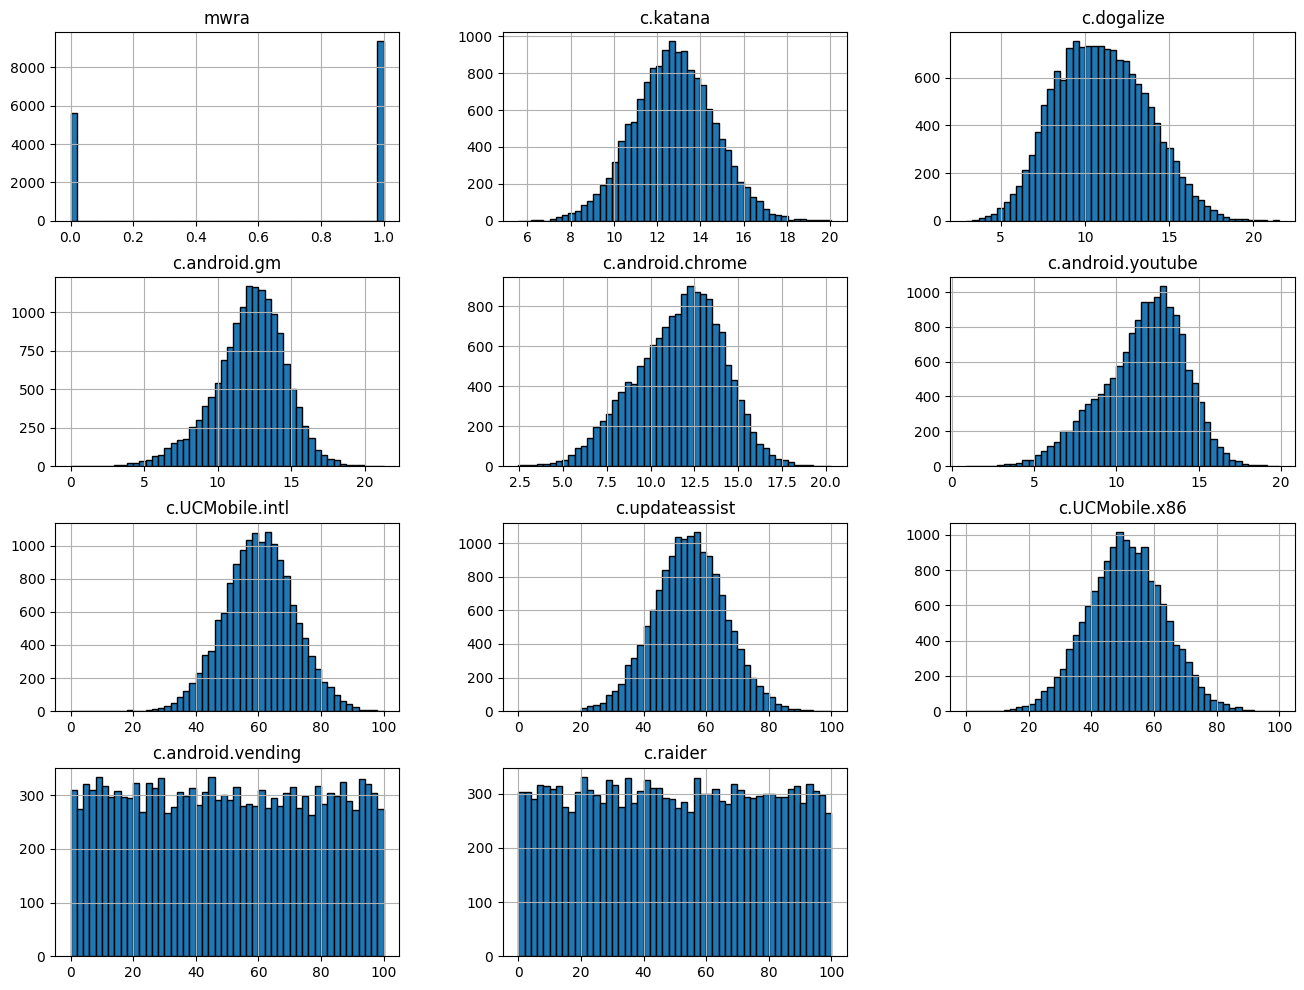

In [893]:
connections_data.drop(columns=['ts', 'imei']).hist(figsize=(16, 12), bins=50, edgecolor='black')

#### Dataset 3: devices


#### Dataset 4: proccesses


### C-D: Pairwise Data Analysis: Identify relationships and dependencies between pairs of attributes. Identify the dependencies between the predicted variable and other variables (potential predictors)

#### Dataset 1: profiles


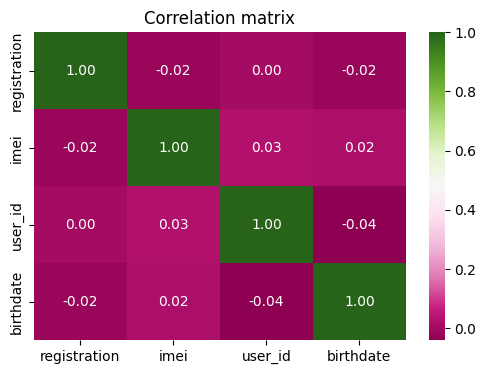

In [894]:
#### Dataset 1 profiles
numeric_cols = profiles_data.select_dtypes(include=[np.datetime64, np.number])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, cmap='PiYG')
plt.title('Correlation matrix')
plt.show()

As we can see in the plot there are no relationships between the attributes. That because the most attributes from profiles profile are not numerical. And imei and user_id are usually unique for each user, and they are not connected with other attributes.

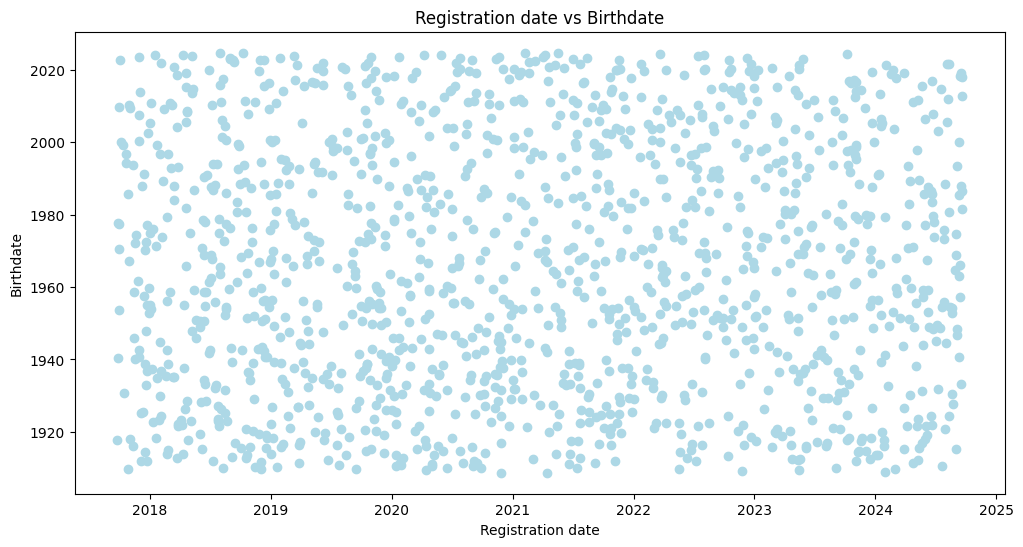

In [895]:
plt.figure(figsize=(12, 6))
plt.scatter(profiles_data['registration'], profiles_data['birthdate'], color=['lightblue'])
plt.title('Registration date vs Birthdate')
plt.xlabel('Registration date')
plt.ylabel('Birthdate')
plt.show()

In the plot above we can see that there is no relationship between the attributes registration and birthdate. The attributes are not connected, as placement of the points is random.

#### Dataset 2: connections

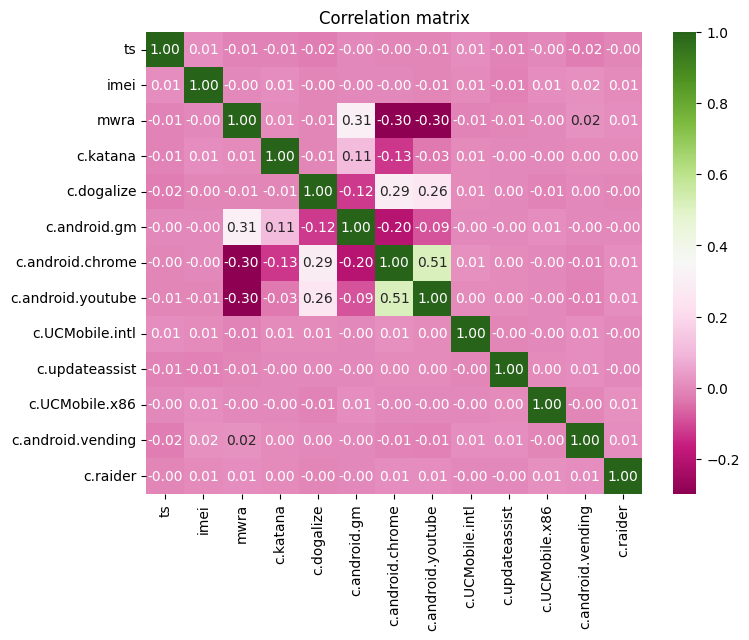

In [896]:
numeric_cols = connections_data.select_dtypes(include=[np.number, np.datetime64])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, cmap='PiYG')
plt.title('Correlation matrix')
plt.show()


In the plot above we can see the correlation between the attributes. 
Below is written attributes that we're going to analyze in the next steps:
- mwra
- c.katana
- c.dogalize
- c.android.gm
- c.android.chrome
- c.android.youtube

We can see negative correlation between mwra and c.android.youtube/c.android.chrome. Negative correlation means that when one attribute is increasing the other is decreasing. The biggest correlation is between c.android.chrome and c.android.youtube. The correlation is 0.51. That means that these attributes are dependent. And they have positive correlation, which means that when one attribute is increasing the other is increasing too.

The correlation is very low between some attributes and is less than 0.01. That means that these attributes are independent. Let's write down the attributes that dont have a correlation higher than 0.01, we won't analyze them in the next steps:
- imei
- c.UCMobile.intl
- c.updateassist
- c.UCMobile.x86
- c.android.vending
- c.raider
- ts

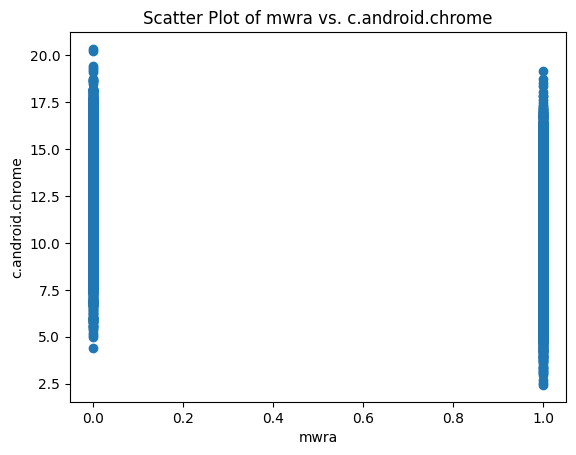

In [897]:
plt.scatter(connections_data['mwra'], connections_data['c.android.chrome'])
plt.xlabel('mwra')
plt.ylabel('c.android.chrome')
plt.title('Scatter Plot of mwra vs. c.android.chrome')
plt.show()

Here we see that mwra in not suitable for prediction. Because it can have only 0 or 1 value. It is categorical variable.

**Linear regression:**

0.5131563666563854
5.6651038291339315


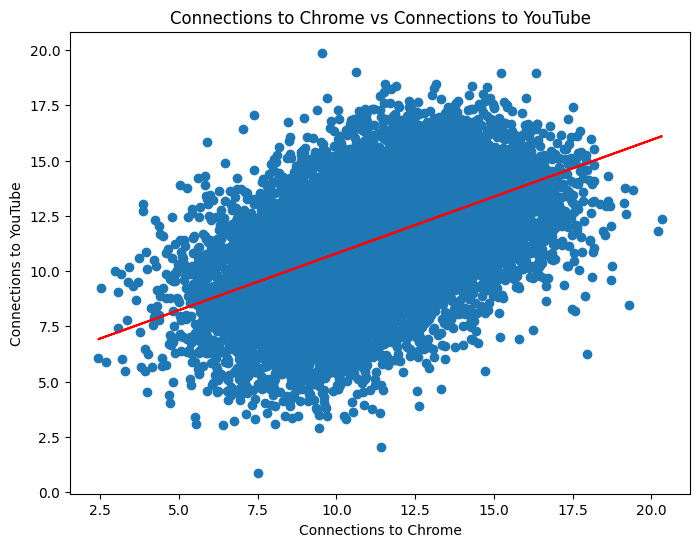

In [910]:
slope, intercept = np.polyfit(connections_data['c.android.chrome'], connections_data['c.android.youtube'], 1)

print(slope)
print(intercept)

regression_line = slope * connections_data['c.android.chrome'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(connections_data['c.android.chrome'], connections_data['c.android.youtube'])
plt.plot(connections_data['c.android.chrome'], regression_line, color='red')
plt.xlabel('Connections to Chrome')
plt.ylabel('Connections to YouTube')
plt.title('Connections to Chrome vs Connections to YouTube')
plt.show()

In the plot above we can see that the correlation is moderately strong positive between connection to chrome and connections to youtube. The correlation is 0.51. That means that when one attribute is increasing the other is increasing too.
The slope of the regression line is 0.513, that means that when the connection to chrome is increasing by 1, there is an expected increase in connection to youtube by 0.513. The intercept is 5.6, which represents the predicted number of connections to Gmail when the number of connections to Chrome is zero.

Here connection to chrome is the independent variable and connection to youtube is the dependent variable. 
Regression line is defined by the formula: y = mx + b, where m is the slope and b is the intercept, x is the independent variable and y is the dependent variable.

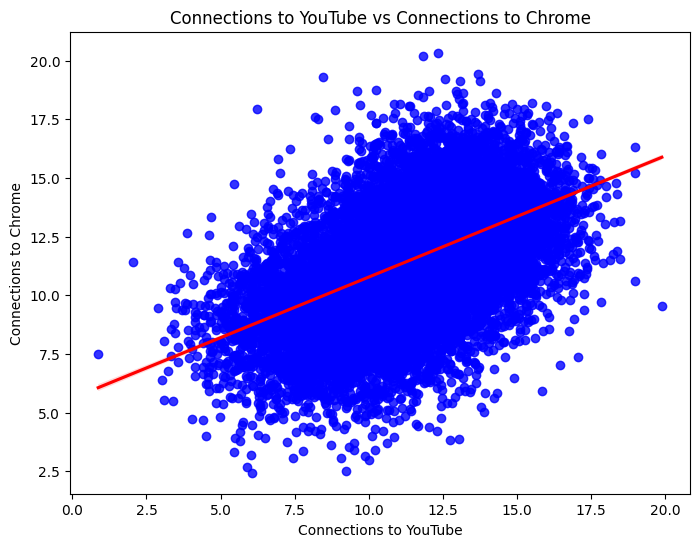

In [940]:
plt.figure(figsize=(8, 6))
sns.regplot(x=connections_data['c.android.youtube'], y=connections_data['c.android.chrome'], line_kws={'color':'red'}, scatter_kws={'color':'blue'})
plt.xlabel('Connections to YouTube')
plt.ylabel('Connections to Chrome')
plt.title('Connections to YouTube vs Connections to Chrome')
plt.show()


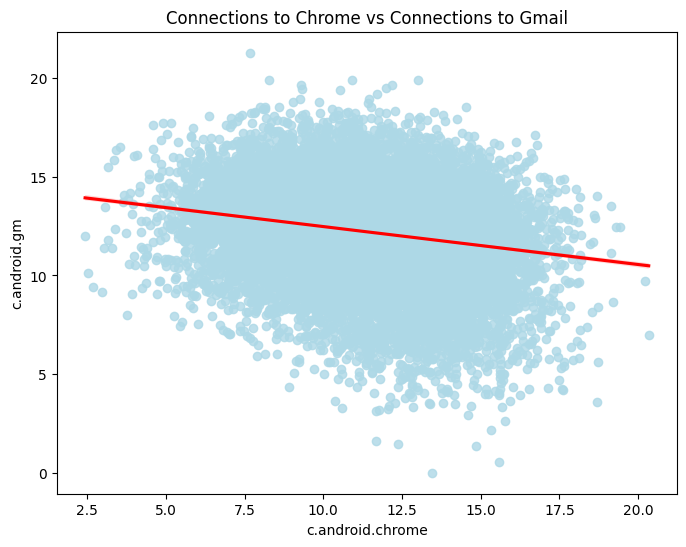

In [918]:
plt.figure(figsize=(8, 6))
sns.regplot(x=connections_data['c.android.chrome'], y=connections_data['c.android.gm'], line_kws={'color':'red'}, scatter_kws={'color':'lightblue'})
plt.title('Connections to Chrome vs Connections to Gmail')
plt.show()

Here we did the same as in the previous plot, but we used seaborn library to plot the regression line. The correlation is -0.20, which is negative. In the plot we can see when the connection to chrome is increasing the connection to youtube is decreasing.

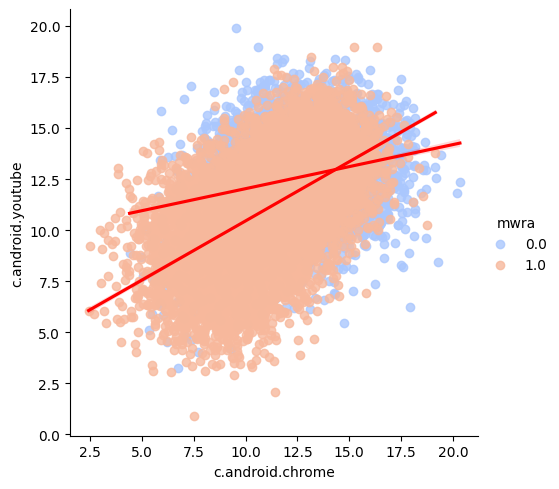

In [909]:
sns.lmplot(x='c.android.chrome', y='c.android.youtube', data=connections_data, hue='mwra', palette='coolwarm', line_kws={'color':'red'})

The plot displays data points representing individual observations, where each point shows the number of connections to YouTube (y-axis) for a corresponding number of connections to Chrome (x-axis). For each category of the mwra variable (represented by different colors based on the coolwarm palette), a red regression line is fitted. These lines depict the linear trend between c.android.chrome and c.android.youtube within each mwra category. The slope of the regression line is different for each category, which indicates that the relationship between the two variables is different for different values of the mwra variable.

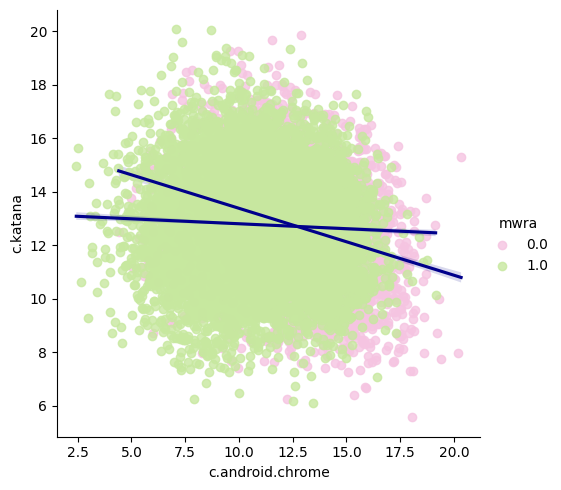

In [932]:
sns.lmplot(x='c.android.chrome', y='c.katana', data=connections_data, hue='mwra', palette='PiYG', line_kws={'color':'darkblue'})

As we can see in the plot above, regression line depends on the mwra value. The slope of the regression line is different for each category, which indicates that the relationship between the two variables is different for different values of the mwra variable. The regression line for the mwra value 1 is negative, is lees negative and close to be neutral.

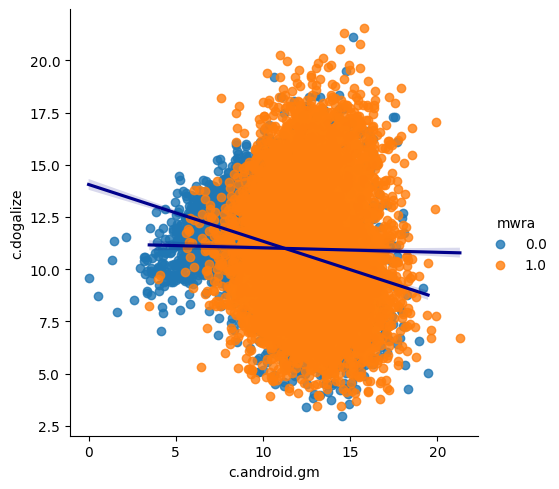

In [933]:
sns.lmplot(x='c.android.gm', y='c.dogalize', data=connections_data, hue='mwra', palette='tab10', line_kws={'color':'darkblue'})

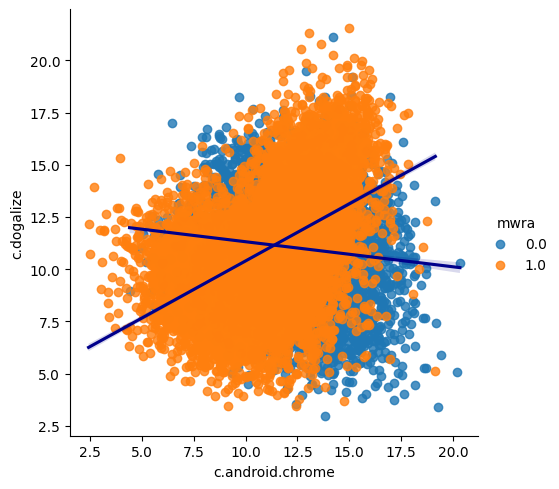

In [935]:
sns.lmplot(x='c.android.chrome', y='c.dogalize', data=connections_data, hue='mwra', palette='tab10', line_kws={'color':'darkblue'})

When analyzing c.dogalize and c.android.chrome we can see major differences in the regression line. The slope of the regression line is different for each category, which indicates that the relationship between the two variables is different for different values of the mwra variable. The regression line for the mwra value 1 is strongly positive, while the regression line for the mwra value 0 is a little negative and close to be neutral.

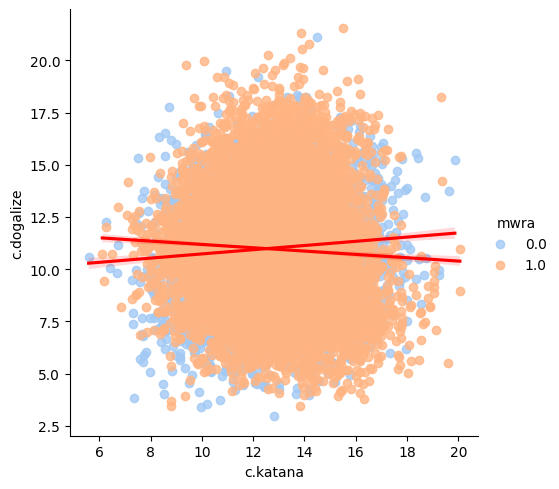

In [943]:
sns.lmplot(x='c.katana', y='c.dogalize', data=connections_data, hue='mwra', palette='pastel', line_kws={'color':'red'})

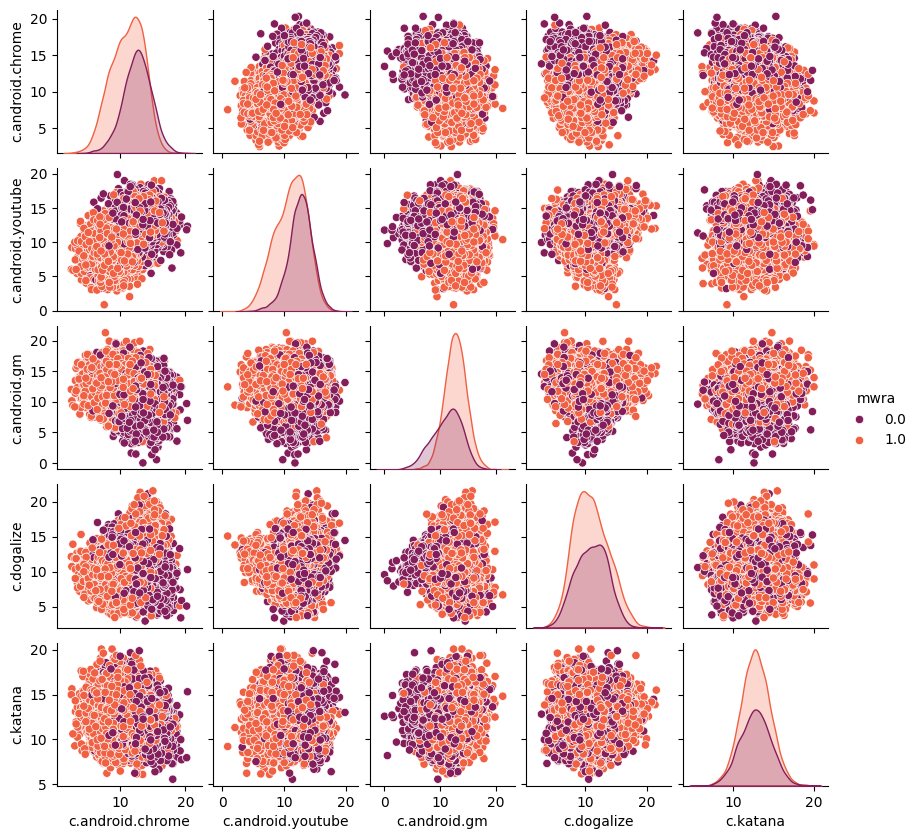

In [ ]:
sns.pairplot(connections_data[['c.android.chrome', 'c.android.youtube', 'c.android.gm','c.dogalize', 'c.katana', 'mwra']], hue='mwra', palette='rocket', height=1.7)

In this plot we can see differences between the distribution based on the mwra value. When mwra is 0, the average number of connections is slightly lower in c.android.chrome and in c.android.youtube, and strongly lower in c.dogalize, c.katana and c.android.gm.

#### Dataset 3: devices


#### Dataset 4: processes


#### Combined datasets

Let's combine datasets and analyze the relationships between the attributes.

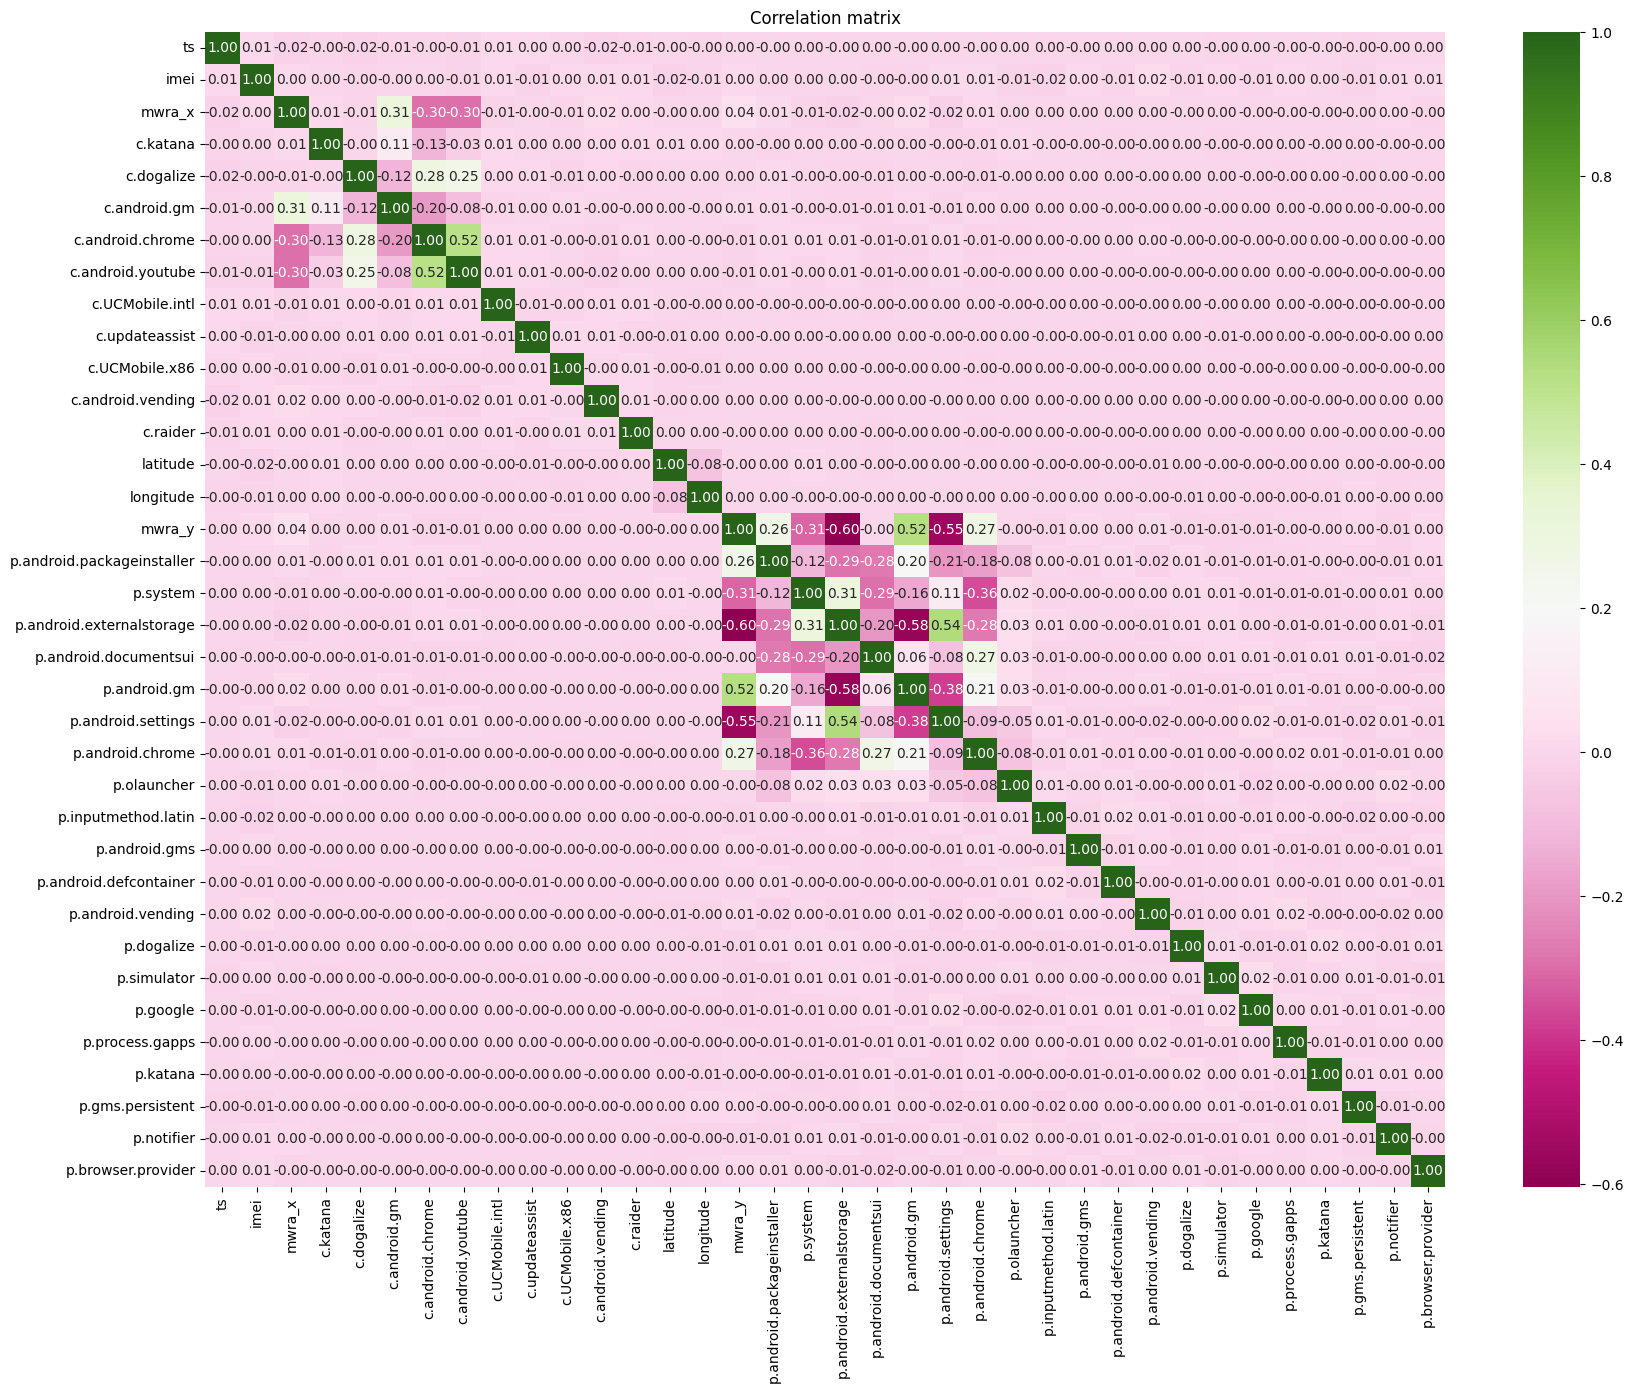

In [945]:
combined_data = pd.merge(connections_data.select_dtypes(include=[np.number, np.datetime64]), devices_data.select_dtypes(include=np.number), on='imei', how='inner')
combined_data = pd.merge(combined_data, proccesses_data.select_dtypes(include=np.number), on='imei', how='inner')

corr_matrix = combined_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, fmt='.2f', annot=True, cmap='PiYG')
plt.title('Correlation matrix')
plt.show()

As we can see in the following table the correlation between different tables is very low. That means that the tables are independent.

### E: Document your initial thinking to address the project brief, e.g. are any attributes interdependent? Which attributes does the predicted variable depend on? Whether records from multiple files need to be combined?

#### Dataset 1: profiles

All of the attributes are independent. 

#### Dataset 2: connections
In the previous plots and correlation matrix we can see some interdependent attributes. c.android.chrome and c.android.youtube have a moderately strong positive correlation. That means that when one attribute is increasing the other is increasing too. Also c.android.chrome and c.dogalize, c.android.chrome nad c.katana are interdependent. The correlation is very low between some attributes and is less than 0.01. That means that these attributes are independent. Predicted variable depends on c.android.chrome, c.android.youtube, c.android.gm, c.dogalize, c.katana. 

#### Dataset 3: devices


#### Dataset 4: processes


#### Summary:
Datasets can be combined, but when we combined them for correlation analysis, we found that the correlation between different tables is very low. That means that the tables are independent.